<a href="https://colab.research.google.com/github/natcan/gen_evol_2025/blob/main/2_DB_gene_duplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧬 Análisis de Duplicaciones Génicas en Carnivores, ungulates and insectivores

Este notebook guía el análisis de duplicaciones génicas usando datos de Ensembl. El objetivo es identificar patrones evolutivos en duplicaciones entre especies vertebradas.



## 📥 1. Carga de datos
Cargaremos los datos de genes duplicados extraídos de Ensembl.


In [51]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

#montamos el drive en nuestro colab
drive.mount('/content/drive')

#configuramos un nuevo directorio de trabajo
new_directory_path = "/content/drive/MyDrive/Colab Notebooks/gen_evol/datasets"
os.chdir(new_directory_path)
!ls

#usaremos "get" para descargar del ftp
#get -O ensembl_genes.tsv "https://useast.ensembl.org/path/to/my/query.tsv"

#por ahora descargaremos manualmente un toy dataset de genes ortólogos de Laurasiatheria (38 species) Carnivores, ungulates and insectivores
#https://useast.ensembl.org/Homo_sapiens/Gene/Compara_Ortholog?g=ENSG00000171105;r=19:7112266-7294045
#descargar en un folder "datasets" dentro

# Cargar datos simulados (reemplazar con rutas reales)
ensembl_df = pd.read_csv('orthologues-ComparaOrthologs-Homo_sapiens_Gene_Compara_Ortholog_ENSG00000112299.csv', sep=',')

# Limpiar columnas de porcentaje
ensembl_df['Target %id'] = ensembl_df['Target %id'].str.replace('%', '').astype(float)
ensembl_df['Query %id'] = ensembl_df['Query %id'].str.replace('%', '').astype(float)

# Mostrar primeras filas
ensembl_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Human_INSR_orthologues.fa
orthologues-ComparaOrthologs-Homo_sapiens_Gene_Compara_Ortholog_ENSG00000112299.csv


,Species,Type,Orthologue,Target %id,Query %id,GOC Score,WGA Coverage,High Confidence
0,Giant panda (Ailuropoda melanoleuca),1-to-1 View Gene Tree,VNN1 (ENSAMEG00000010616) Compare Regions (10...,79.92,79.92,100.0,NaN,Yes
1,Duck (Anas platyrhynchos platyrhynchos),Many-to-many View Gene Tree,"ENSAPLG00000008745 Compare Regions (3:59,018,0...",61.20,59.65,100.0,56.49,Yes
2,Duck (Anas platyrhynchos platyrhynchos),Many-to-many View Gene Tree,"ENSAPLG00000008759 Compare Regions (3:59,025,4...",66.40,64.33,100.0,33.63,Yes
3,Duck (Anas platyrhynchos platyrhynchos),Many-to-many View Gene Tree,ENSAPLG00000027089 Compare Regions (PEDO010107...,62.75,12.48,0.0,0.00,No
4,Green anole (Anolis carolinensis),Many-to-many View Gene Tree,ENSACAG00000010522 Compare Regions (GL343200.1...,65.60,63.94,100.0,NaN,Yes



## 📊 2. Visualización de duplicaciones por especie


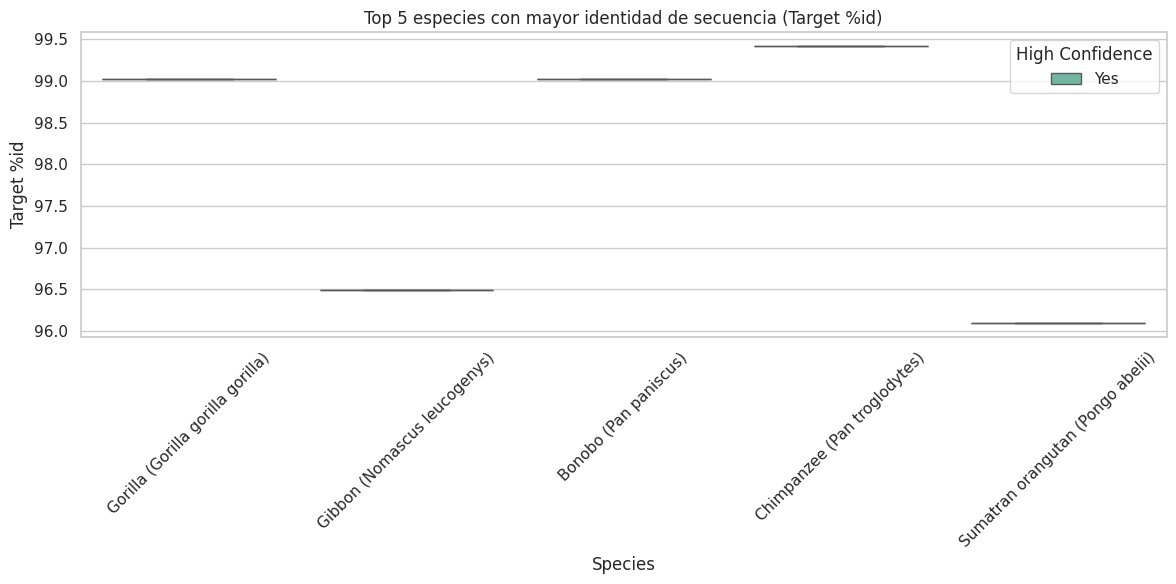

In [52]:
# Calcular promedio por especie
top_species = ensembl_df.groupby('Species')['Target %id'].mean().nlargest(5).index
filtered_df = ensembl_df[ensembl_df['Species'].isin(top_species)]

# Visualización
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x='Species', y='Target %id', hue='High Confidence', palette='Set2')
plt.title('Top 5 especies con mayor identidad de secuencia (Target %id)')
plt.ylabel('Target %id')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## 🧠 3. Preguntas de interpretación
- ¿Qué especies presentan mayor nivel de identidad al receptor de insulina humano?
- ¿Qué implicancias evolutivas tiene?
